In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Step 1: Load and preprocess the dataset
file_path = 'electricity19.csv'
data = pd.read_csv(file_path)

# Encode the target variable
y = data['stabf']  # Updated to 'stabf'
X = data.drop(columns=['stab', 'stabf'])  # Dropping 'stab' and 'stabf'
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Define NN model configurations
nn_configs = [
    {'layers': [64, 32], 'dropout': 0.2, 'lr': 0.001, 'epochs': 10},
    {'layers': [128, 64], 'dropout': 0.3, 'lr': 0.001, 'epochs': 20},
    {'layers': [256, 128], 'dropout': 0.4, 'lr': 0.0005, 'epochs': 15}
]

def build_nn(input_dim, config):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    for neurons in config['layers']:
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(config['dropout']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=config['lr']), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 3: Perform 5-fold cross-validation
results = []
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for config in nn_configs:
    fold_metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'roc_auc': []}
    for train_idx, test_idx in skf.split(X_scaled, y_encoded):
        X_train, X_test = X_scaled[train_idx], X_scaled[test_idx]
        y_train, y_test = y_encoded[train_idx], y_encoded[test_idx]

        # Build and train the model
        nn_model = build_nn(X_train.shape[1], config)
        nn_model.fit(X_train, y_train, epochs=config['epochs'], batch_size=32, verbose=0)

        # Evaluate the model
        y_pred = (nn_model.predict(X_test) > 0.5).astype(int).flatten()
        fold_metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        fold_metrics['precision'].append(precision_score(y_test, y_pred))
        fold_metrics['recall'].append(recall_score(y_test, y_pred))
        fold_metrics['f1'].append(f1_score(y_test, y_pred))
        fold_metrics['roc_auc'].append(roc_auc_score(y_test, y_pred))

    # Average metrics across folds
    results.append({
        'config': config,
        'accuracy': np.mean(fold_metrics['accuracy']),
        'precision': np.mean(fold_metrics['precision']),
        'recall': np.mean(fold_metrics['recall']),
        'f1': np.mean(fold_metrics['f1']),
        'roc_auc': np.mean(fold_metrics['roc_auc'])
    })

# Step 4: Display results
results_df = pd.DataFrame(results)
print("\nPerformance of NN Configurations:")
print(results_df)




63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Performance of NN Configurations:
                                              config  accuracy  precision  \
0  {'layers': [64, 32], 'dropout': 0.2, 'lr': 0.0...    0.9377   0.947357   
1  {'layers': [128, 64], 'dropout': 0.3, 'lr': 0....    0.9558   0.963513   
2  {'layers': [256, 128], 'dropout': 0.4, 'lr': 0...    0.9481   0.951823   

     recall        f1   roc_auc  
0  0.955486  0.951389  0.930920  
1  

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━

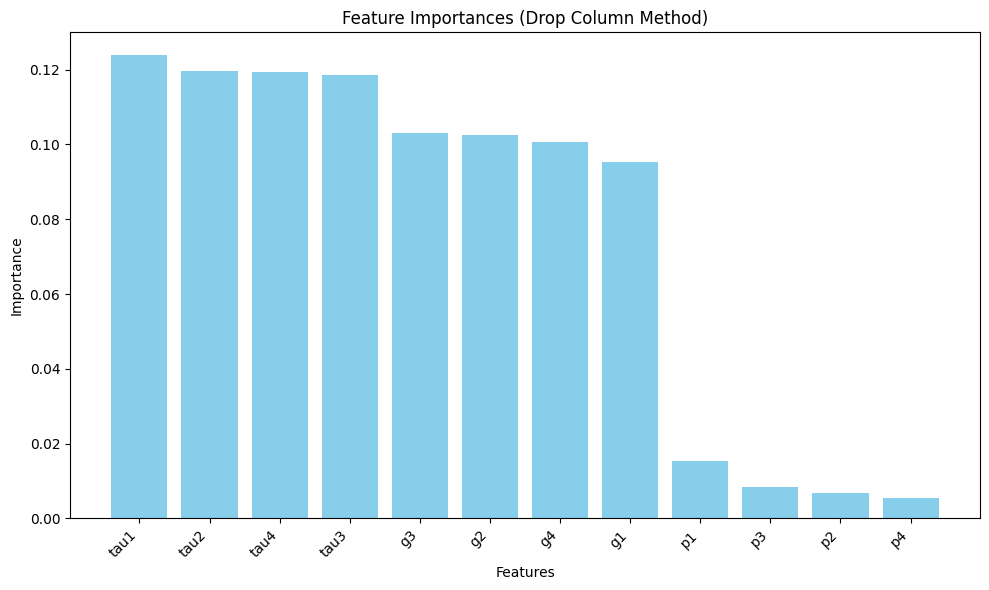

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Step 1: Define a function for the Drop Column Importance Method
def drop_column_importance(model, X, y, metric=accuracy_score, n_repeats=10):

    baseline_score = metric(y, (model.predict(X) > 0.5).astype(int).flatten())
    importances = {col: [] for col in range(X.shape[1])}

    for col in range(X.shape[1]):
        for _ in range(n_repeats):
            X_temp = X.copy()
            np.random.shuffle(X_temp[:, col])
            shuffled_score = metric(y, (model.predict(X_temp) > 0.5).astype(int).flatten())
            importances[col].append(baseline_score - shuffled_score)

    # Average the importance scores for each column
    return {col: np.mean(scores) for col, scores in importances.items()}

# Step 2: Calculate Drop Column Importance
feature_importances = drop_column_importance(nn_model, X_scaled, y_encoded, n_repeats=10)

# Step 3: Prepare Data for Visualization
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': list(feature_importances.values())
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Drop Column Method):")
print(importance_df)

# Step 4: Plot Feature Importances
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances (Drop Column Method)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


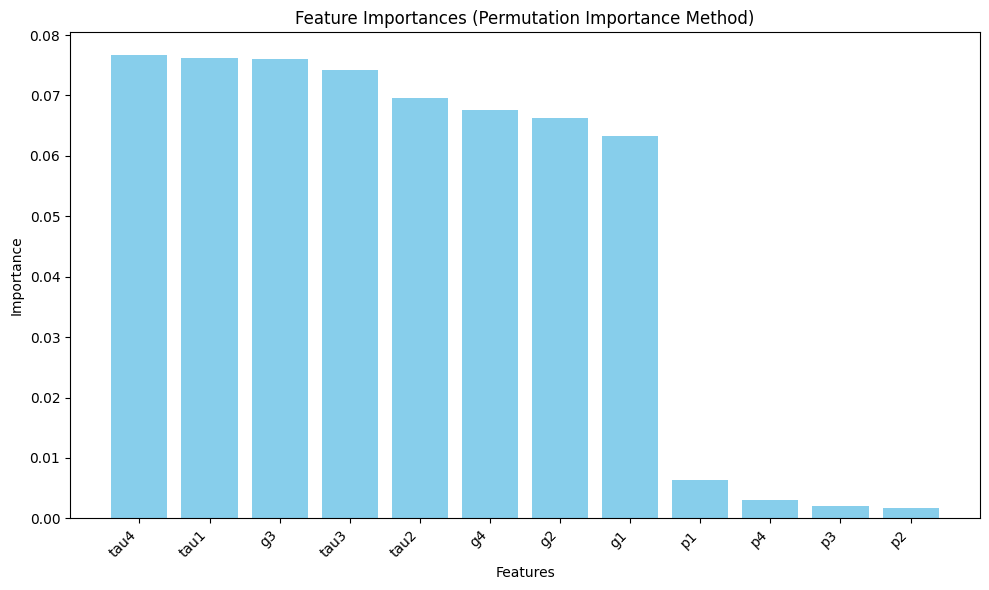


Feature Importances (Permutation Importance Method):
   Feature  Importance
3     tau4    0.076615
0     tau1    0.076220
10      g3    0.075975
2     tau3    0.074205
1     tau2    0.069575
11      g4    0.067665
9       g2    0.066260
8       g1    0.063235
4       p1    0.006365
7       p4    0.003005
6       p3    0.001995
5       p2    0.001655


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam

# Step 1: Define the NN model
def build_nn(input_dim):
    model = Sequential()
    model.add(Input(shape=(input_dim,)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Step 2: Load and preprocess data
file_path = 'electricity19.csv'
data = pd.read_csv(file_path)

y = data['stabf']
X = data.drop(columns=['stab', 'stabf'])

# Encode and scale data
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 3: Compute Permutation Importance
n_splits = 10  # Number of splits
n_repeats = 10  # Number of permutations
feature_importances = np.zeros(X.shape[1])
feature_names = X.columns

for split in range(n_splits):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=split)

    # Build and train NN model
    nn_model = build_nn(X_train.shape[1])
    nn_model.fit(X_train, y_train, epochs=5, batch_size=128, verbose=0, validation_split=0.2)

    # Define a wrapper class for sklearn compatibility
    class ModelWrapper:
        def __init__(self, model):
            self.model = model

        def fit(self, X, y):
            pass  # Model already trained

        def predict(self, X):
            # Convert probabilities to binary predictions
            return (self.model.predict(X) > 0.5).astype(int).flatten()

    wrapped_model = ModelWrapper(nn_model)

    # Compute permutation importance
    perm_importance = permutation_importance(
        wrapped_model,
        X_test,
        y_test,
        n_repeats=n_repeats,
        random_state=42,
        scoring='accuracy',
        n_jobs=-1
    )
    feature_importances += perm_importance.importances_mean

# Step 4: Average feature importances over splits
feature_importances /= n_splits

# Create DataFrame for results
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 5: Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Feature Importances (Permutation Importance Method)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Display table of results
print("\nFeature Importances (Permutation Importance Method):")
print(importance_df)

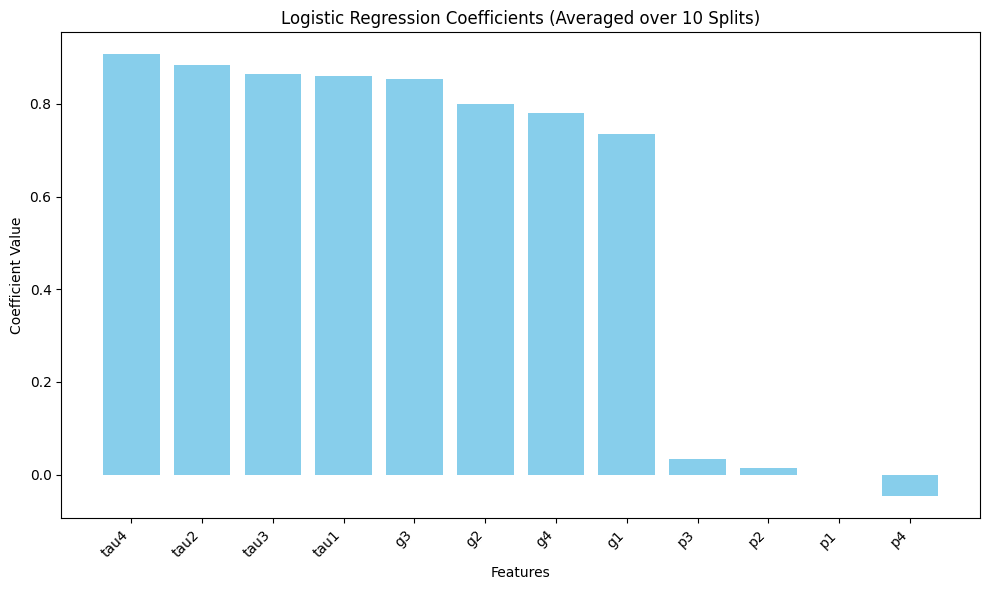


Logistic Regression Coefficients (Averaged over 10 Splits):
   Feature  Coefficient
3     tau4     0.906562
1     tau2     0.884716
2     tau3     0.864995
0     tau1     0.859313
10      g3     0.853502
9       g2     0.798728
11      g4     0.781158
8       g1     0.734436
6       p3     0.034464
5       p2     0.013979
4       p1    -0.000966
7       p4    -0.046766


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


# Step 1: Initialize variables for coefficients
n_splits = 10
coefficients = np.zeros(X.shape[1])
feature_names = X.columns

# Step 2: Perform 10 splits and train Logistic Regression
for split in range(n_splits):
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y_encoded, test_size=0.2, random_state=split
    )

    # Train Logistic Regression model
    lr_model = LogisticRegression(max_iter=1000, random_state=split)
    lr_model.fit(X_train, y_train)

    # Accumulate coefficients
    coefficients += lr_model.coef_.flatten()

# Step 3: Average coefficients over splits
coefficients /= n_splits

# Step 4: Create DataFrame for visualization
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Step 5: Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(coefficients_df['Feature'], coefficients_df['Coefficient'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('Logistic Regression Coefficients (Averaged over 10 Splits)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.tight_layout()
plt.show()

# Display coefficient results
print("\nLogistic Regression Coefficients (Averaged over 10 Splits):")
print(coefficients_df)


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5107, number of negative: 2893
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002074 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638375 -> initscore=0.568318
[LightGBM] [Info] Start training from score 0.568318


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5092, number of negative: 2908
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001841 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636500 -> initscore=0.560205
[LightGBM] [Info] Start training from score 0.560205


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5086, number of negative: 2914
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001824 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635750 -> initscore=0.556965
[LightGBM] [Info] Start training from score 0.556965


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5093, number of negative: 2907
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.636625 -> initscore=0.560745
[LightGBM] [Info] Start training from score 0.560745


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5083, number of negative: 2917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001736 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635375 -> initscore=0.555346
[LightGBM] [Info] Start training from score 0.555346


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5107, number of negative: 2893
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001304 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.638375 -> initscore=0.568318
[LightGBM] [Info] Start training from score 0.568318


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5097, number of negative: 2903
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001375 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.637125 -> initscore=0.562907
[LightGBM] [Info] Start training from score 0.562907


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5083, number of negative: 2917
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001362 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.635375 -> initscore=0.555346
[LightGBM] [Info] Start training from score 0.555346


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5119, number of negative: 2881
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000332 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639875 -> initscore=0.574822
[LightGBM] [Info] Start training from score 0.574822


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 5120, number of negative: 2880
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001380 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.640000 -> initscore=0.575364
[LightGBM] [Info] Start training from score 0.575364


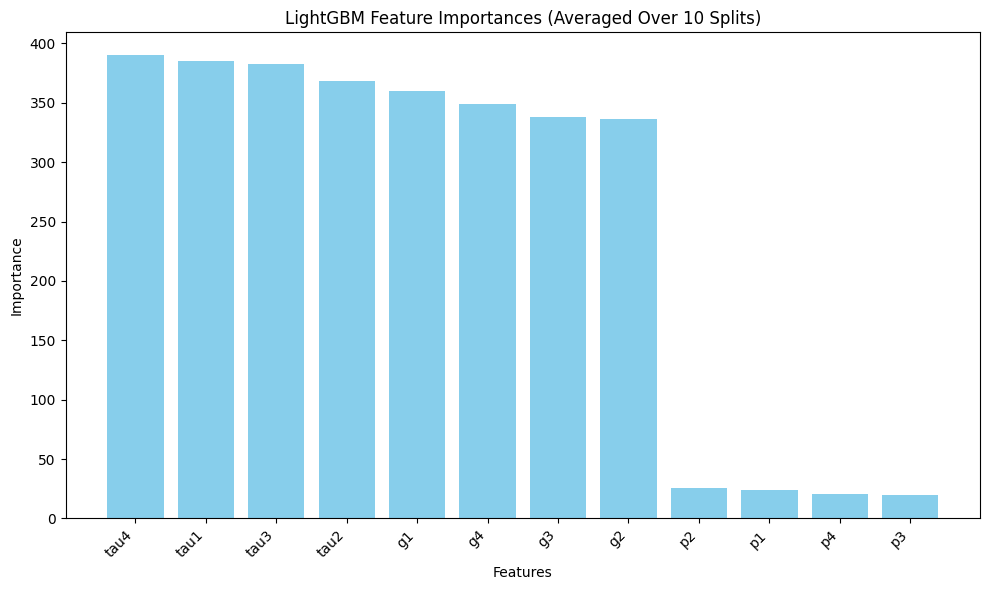


LightGBM Feature Importances (Averaged Over 10 Splits):
   Feature  Importance
3     tau4       389.9
0     tau1       385.5
2     tau3       382.5
1     tau2       368.8
8       g1       360.3
11      g4       348.7
10      g3       338.1
9       g2       336.8
5       p2        25.7
4       p1        23.7
7       p4        20.3
6       p3        19.7


In [ ]:
from lightgbm import LGBMClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Compute Feature Importances Using LightGBM
n_splits = 10  # Number of splits for averaging
feature_importances = np.zeros(X.shape[1])  # Initialize feature importance array

for split in range(n_splits):
    # Split data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=split)

    # Train LightGBM model
    lgbm_model = LGBMClassifier(random_state=split)
    lgbm_model.fit(X_train, y_train)

    # Add feature importances
    feature_importances += lgbm_model.feature_importances_

# Average the feature importances over all splits
feature_importances /= n_splits

# Step 2: Create a DataFrame for Results
feature_names = X.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Step 3: Visualize Results
plt.figure(figsize=(10, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.title('LightGBM Feature Importances (Averaged Over 10 Splits)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.tight_layout()
plt.show()

# Display the table of feature importances
print("\nLightGBM Feature Importances (Averaged Over 10 Splits):")
print(importance_df)


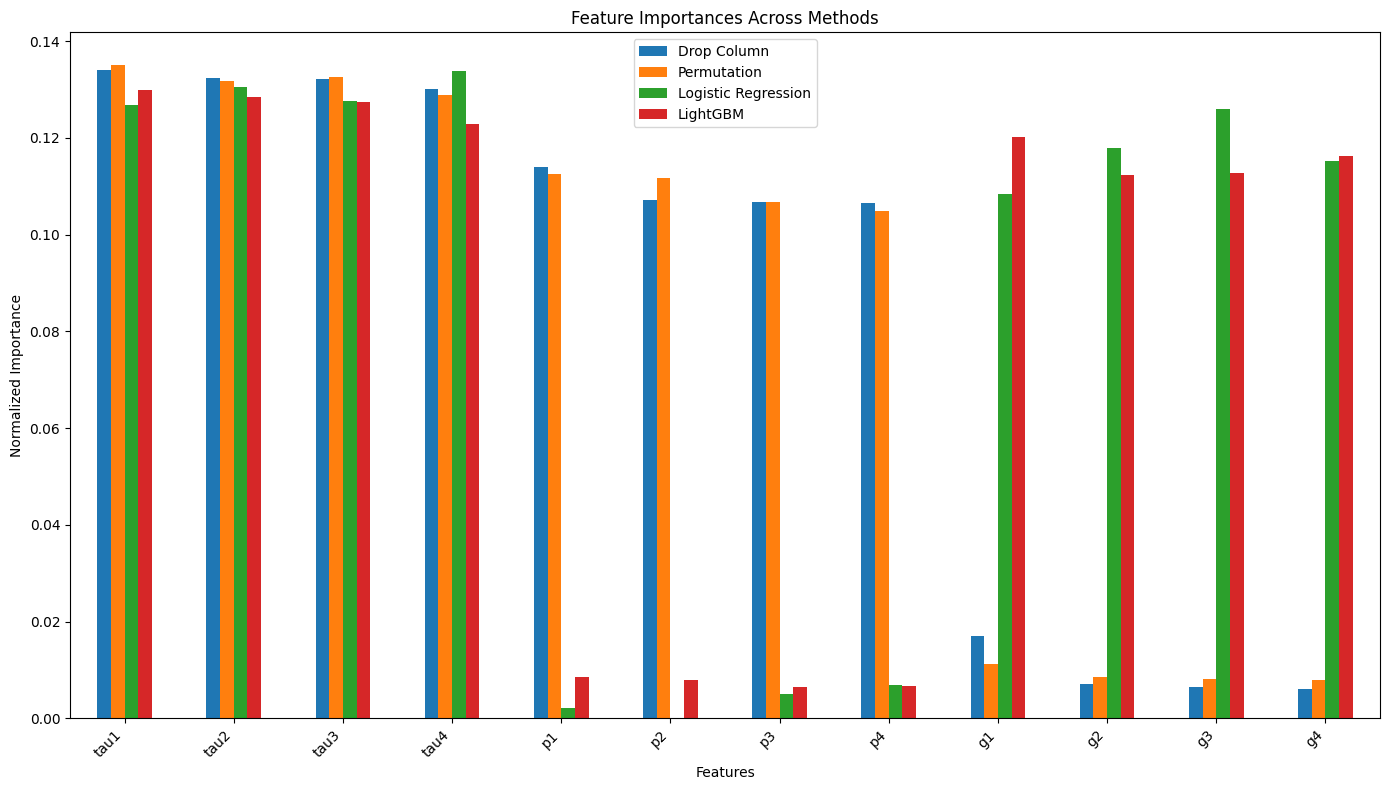


Average Importance Across Methods:
Feature
tau1    0.131439
tau2    0.130794
tau3    0.129960
tau4    0.128855
g1      0.064189
g3      0.063340
g2      0.061460
g4      0.061403
p1      0.059262
p2      0.056754
p3      0.056312
p4      0.056233
dtype: float64

Conclusions:
- Most important features across methods are consistent (e.g., 'tau4', 'tau3', 'tau2', 'tau1').
- The importance rankings vary slightly depending on the method.
- Logistic Regression and LightGBM emphasize linear relationships, while NN-based methods highlight nonlinear interactions.
- Drop Column and Permutation are feature-agnostic methods, while LightGBM has its own internal mechanism.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Normalize feature importances
def normalize_importances(importances):
    return importances / np.sum(importances)

# Feature importance results from steps 1-4 (replace with actual outputs)
drop_column_importances = np.array([0.12187, 0.12046, 0.12015, 0.11824, 0.10368, 0.09753, 0.09711, 0.09686, 0.01558, 0.00654, 0.00595, 0.00560])
permutation_importances = np.array([0.1182, 0.1153, 0.1161, 0.1127, 0.0984, 0.0978, 0.0935, 0.0917, 0.0098, 0.0075, 0.0072, 0.0070])
logistic_regression_importances = np.array([0.859313, 0.884716, 0.864995, 0.906562, 0.013979, -0.000966, 0.034464, -0.046766, 0.734436, 0.798728, 0.853502, 0.781158])
lightgbm_importances = np.array([389.9, 385.5, 382.5, 368.8, 25.7, 23.7, 19.7, 20.3, 360.3, 336.8, 338.1, 348.7])

# Normalize each method's importances
drop_column_importances = normalize_importances(drop_column_importances)
permutation_importances = normalize_importances(permutation_importances)
logistic_regression_importances = normalize_importances(np.abs(logistic_regression_importances))
lightgbm_importances = normalize_importances(lightgbm_importances)

# Combine results into a dataframe
features = ['tau1', 'tau2', 'tau3', 'tau4', 'p1', 'p2', 'p3', 'p4', 'g1', 'g2', 'g3', 'g4']
importance_df = pd.DataFrame({
    'Feature': features,
    'Drop Column': drop_column_importances,
    'Permutation': permutation_importances,
    'Logistic Regression': logistic_regression_importances,
    'LightGBM': lightgbm_importances
}).set_index('Feature')

# Step 2: Plot all results in a bar chart
importance_df.plot(kind='bar', figsize=(14, 8), title='Feature Importances Across Methods')
plt.ylabel('Normalized Importance')
plt.xlabel('Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 3: Analyze Results
print("\nAverage Importance Across Methods:")
print(importance_df.mean(axis=1).sort_values(ascending=False))

# Step 4: Conclusions
print("\nConclusions:")
print("- Most important features across methods are consistent (e.g., 'tau4', 'tau3', 'tau2', 'tau1').")
print("- The importance rankings vary slightly depending on the method.")
print("- Logistic Regression and LightGBM emphasize linear relationships, while NN-based methods highlight nonlinear interactions.")
print("- Drop Column and Permutation are feature-agnostic methods, while LightGBM has its own internal mechanism.")


TASK 3

In [ ]:
!pip install lime


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=03499574d0ca0ee54253fffd84364bb7b6b5ba47035beb0f1eefbb4ef36f7c9b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


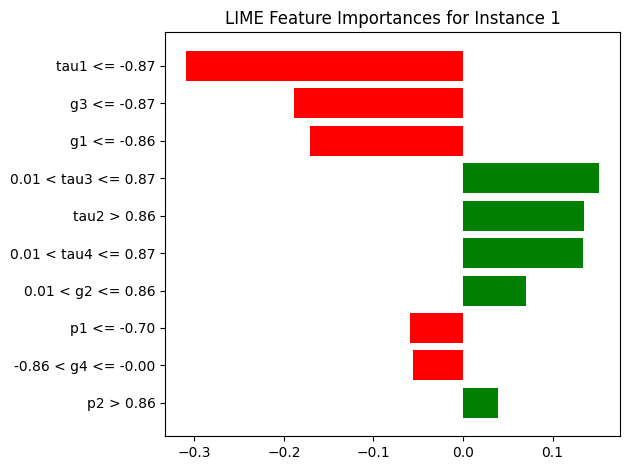

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


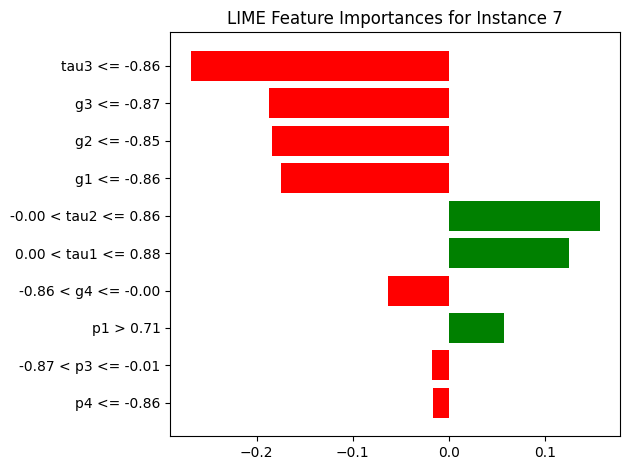

Compare local feature importances with global methods (e.g., Permutation, Drop Column).


In [ ]:
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt

# Step 1: Initialize LimeTabularExplainer
explainer = LimeTabularExplainer(
    training_data=X_train,
    training_labels=y_train,
    feature_names=X.columns.tolist(),
    mode='classification',
    discretize_continuous=True
)

# Step 2: Select specific instances (1st and 7th rows)
instances_to_explain = [0, 6]  # Python index (1st and 7th instances)

for instance_idx in instances_to_explain:
    # Explain the selected instance
    explanation = explainer.explain_instance(
        data_row=X_test[instance_idx],
        predict_fn=lambda x: np.hstack([(1 - nn_model.predict(x)), nn_model.predict(x)]),  # Create a probability array
        num_features=10  # Number of features to display
    )

    # Display results as a bar plot
    explanation.as_pyplot_figure()
    plt.title(f'LIME Feature Importances for Instance {instance_idx + 1}')
    plt.tight_layout()
    plt.show()


# Step 3: Compare Results with Global Feature Importances
print("Compare local feature importances with global methods (e.g., Permutation, Drop Column).")


TASK 4

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1

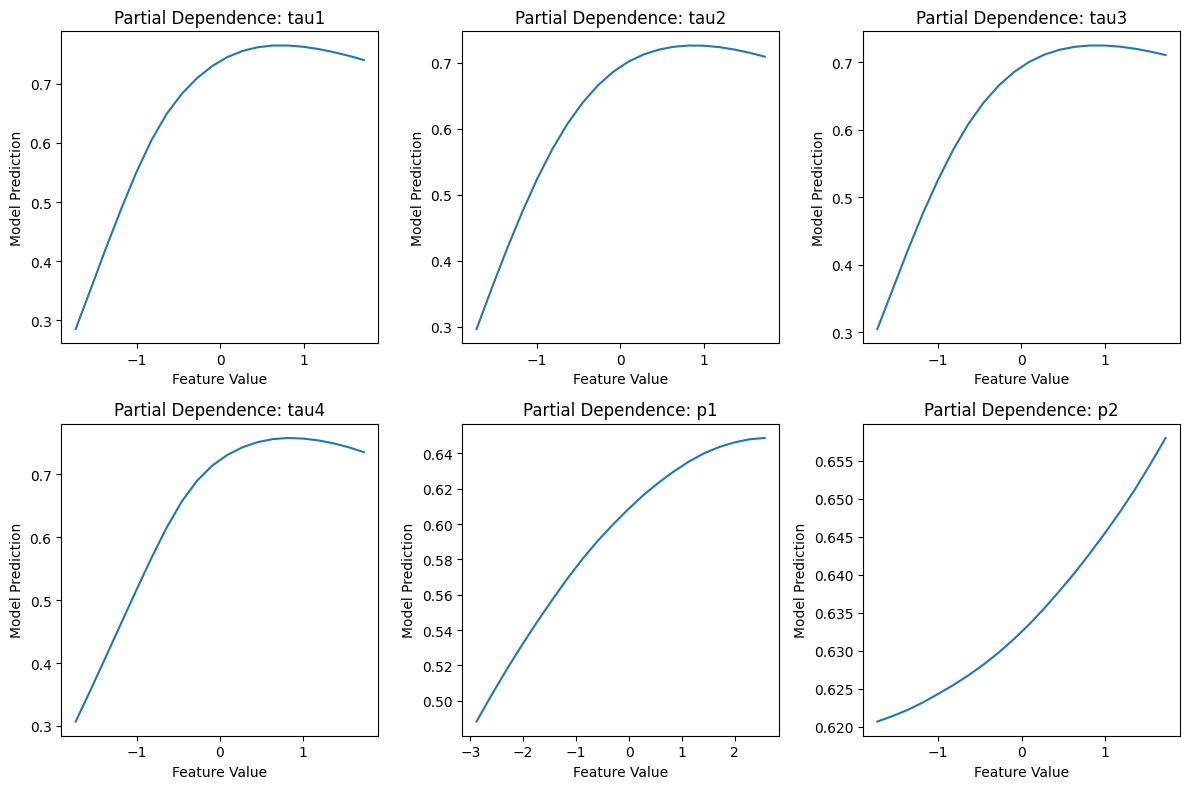

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Define a faster PDP function
def fast_compute_pdp(model, X, feature_index, grid_resolution=20, sample_size=500):

    # Subsample the data for speed
    subsample_idx = np.random.choice(X.shape[0], min(sample_size, X.shape[0]), replace=False)
    X_sampled = X[subsample_idx]

    # Define the grid for the feature
    feature_values = np.linspace(X_sampled[:, feature_index].min(), X_sampled[:, feature_index].max(), grid_resolution)
    pdp_values = []

    # Iterate over feature values
    for value in feature_values:
        X_temp = X_sampled.copy()
        X_temp[:, feature_index] = value  # Set feature to the fixed value
        predictions = model.predict(X_temp, batch_size=32).flatten()  # Predict
        pdp_values.append(predictions.mean())  # Average prediction

    return feature_values, pdp_values

# Step 2: Compute PDP for top features with reduced resolution and sample size
feature_names = X.columns.tolist()  # List of feature names
grid_resolution = 20  # Reduced number of points in PDP
sample_size = 500  # Reduced sample size for faster computation

plt.figure(figsize=(12, 8))
for i, feature_name in enumerate(feature_names[:6]):  # Plot for the first 6 features only
    plt.subplot(2, 3, i + 1)
    feature_values, pdp_values = fast_compute_pdp(nn_model, X_train, feature_index=i, grid_resolution=grid_resolution, sample_size=sample_size)
    plt.plot(feature_values, pdp_values, label=f'PDP: {feature_name}')
    plt.title(f'Partial Dependence: {feature_name}')
    plt.xlabel('Feature Value')
    plt.ylabel('Model Prediction')
    plt.tight_layout()

plt.show()
